# Notebook all about Satellite Launches

Satcat dataset: https://celestrak.org/satcat/search.php

```
OBJECT_NAME		Satellite Name(s)

    R/B(1) = Rocket body, first stage
    R/B(2) = Rocket body, second stage
    DEB = Debris
    PLAT = Platform
    Items in parentheses are alternate names
    Items in brackets indicate type of object
    (e.g., BREEZE-M DEB [TANK] = tank)
    An ampersand (&) indicates two or more objects are attached
```

```
OBJECT_ID		International Designator (YYYY-NNNAAA)

    Launch year (4 digits)
    Launch of the year (3 digits)
    Piece of the launch (1-3 alphabetic characters, excluding I and O)
```

```
NORAD_CAT_ID	NORAD Catalog Number
```

```
OBJECT_TYPE		Object type

    PAY = Payload
    R/B = Rocket body
    DEB = Other debris
    UNK = Unknown
```

```
OPS_STATUS_CODE	Operational Status Code
```

```
OWNER			Ownership
```

```
LAUNCH_DATE		Launch Date [year-month-day] (ISO 8601)
```

```
LAUNCH_SITE		Launch Site
```

```
DECAY_DATE		Decay Date, if applicable [year-month-day] (ISO 8601)
```

```
PERIOD			Orbital period [minutes]; null if no data available
```

```
INCLINATION		Inclination [degrees]; null if no data available
```

```
APOGEE			Apogee Altitude [kilometers]; null if no data available
```

```
PERIGEE			Perigee Altitude [kilometers]; null if no data available
```

```
RCS				Radar Cross Section [meters2]; null if no data available
```

```
DATA_STATUS_CODE	Data status code; blank otherwise

    NCE = No Current Elements
    NIE = No Initial Elements
    NEA = No Elements Available
```

```
ORBIT_CENTER	Orbit center

    AS = Asteroid
    CO = Comet
    EA = Earth
    ELx = Earth Lagrange (EL1 = Earth L1, EL2 = Earth L2)
    EM = Earth-Moon Barycenter
    JU = Jupiter
    MA = Mars
    ME = Mercury
    MO = Moon (Earth)
    NE = Neptune
    PL = Pluto
    SA = Saturn
    SS = Solar System Escape
    SU = Sun
    UR = Uranus
    VE = Venus
    NORAD_CAT_ID for docked objects
```

```
ORBIT_TYPE		Orbit type

    ORB = Orbit
    LAN = Landing
    IMP = Impact
    DOC = Docked to another object in the SATCAT
    R/T = Roundtrip
```

In [127]:
import pandas as pd

# https://celestrak.org/satcat/search.php
df = pd.read_csv("satcat.csv")

# Filter to Earth Orbit Center
df = df[df["ORBIT_CENTER"] == "EA"]

# Convert Dates to a pandas timestamp
df["LAUNCH_DATE"] = pd.to_datetime(df["LAUNCH_DATE"], format='%Y-%m-%d')
df["DECAY_DATE"] = pd.to_datetime(df["DECAY_DATE"], format='%Y-%m-%d')

df["LAUNCH_YEAR"] = df.apply(lambda row: row["LAUNCH_DATE"].year, axis=1)

df

,OBJECT_NAME,OBJECT_ID,NORAD_CAT_ID,OBJECT_TYPE,OPS_STATUS_CODE,OWNER,LAUNCH_DATE,LAUNCH_SITE,DECAY_DATE,PERIOD,INCLINATION,APOGEE,PERIGEE,RCS,DATA_STATUS_CODE,ORBIT_CENTER,ORBIT_TYPE,LAUNCH_YEAR
0,SL-1 R/B,1957-001A,1,R/B,D,CIS,1957-10-04,TYMSC,1957-12-01,96.19,65.10,938.0,214.0,20.420,NaN,EA,IMP,1957
1,SPUTNIK 1,1957-001B,2,PAY,D,CIS,1957-10-04,TYMSC,1958-01-03,96.10,65.00,1080.0,64.0,NaN,NaN,EA,IMP,1957
2,SPUTNIK 2,1957-002A,3,PAY,D,CIS,1957-11-03,TYMSC,1958-04-14,103.74,65.33,1659.0,211.0,0.080,NaN,EA,IMP,1957
3,EXPLORER 1,1958-001A,4,PAY,D,US,1958-02-01,AFETR,1970-03-31,88.48,33.15,215.0,183.0,NaN,NaN,EA,IMP,1958
4,VANGUARD 1,1958-002B,5,PAY,NaN,US,1958-03-17,AFETR,NaT,132.72,34.25,3832.0,649.0,0.122,NaN,EA,ORB,1958
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53996,OBJECT E,2022-133E,54046,UNK,NaN,PRC,2022-10-14,XICLF,NaT,94.47,35.00,499.0,487.0,NaN,NaN,EA,ORB,2022
53997,CREW DRAGON 4 DEB,2022-042B,54047,DEB,NaN,US,2022-04-27,AFETR,NaT,92.67,51.33,408.0,402.0,NaN,NaN,EA,ORB,2022
53998,OBJECT A,2022-134A,54048,PAY,+,EUTE,2022-10-15,AFETR,NaT,1067.06,26.81,56050.0,374.0,NaN,NaN,EA,ORB,2022
53999,OBJECT B,2022-134B,54049,UNK,NaN,US,2022-10-15,AFETR,NaT,1067.77,26.86,56057.0,397.0,NaN,NaN,EA,ORB,2022


# OWNER statistics

also see: https://celestrak.org/satcat/sources.php

<AxesSubplot:ylabel='OBJECT_NAME'>

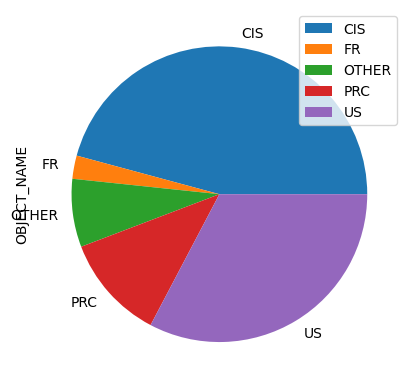

In [118]:
# Pie chart of all Owners historically

# CIS: Commonwealth of Independent States (Soviet Union, kinda)
# US: United States
# PRC: People's Republic of China
# FR: France
# Other: Rest

df_count = df.groupby(["OWNER"], as_index=False).count().filter(["OWNER", "OBJECT_NAME"])
df_count["OWNER_NEW"] = df_count.apply(lambda row: row["OWNER"] if row["OBJECT_NAME"] > 800 else "OTHER", axis=1)
df_count.groupby(["OWNER_NEW"]).sum().plot(kind="pie", y="OBJECT_NAME")

<AxesSubplot:ylabel='OBJECT_NAME'>

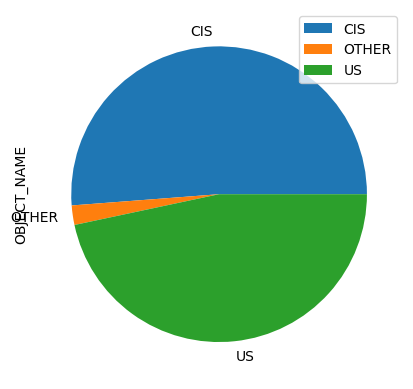

In [120]:
# Pie chart of all Owners from 1950-1980

filtered_df = df.loc[(df["LAUNCH_DATE"] >= "1950-01-01")
                    &  (df["LAUNCH_DATE"] < "1980-01-01")]
df_count = filtered_df.groupby(["OWNER"], as_index=False).count().filter(["OWNER", "OBJECT_NAME"])
df_count["OWNER_NEW"] = df_count.apply(lambda row: row["OWNER"] if row["OBJECT_NAME"] > 100 else "OTHER", axis=1)
df_count.groupby(["OWNER_NEW"]).sum().plot(kind="pie", y="OBJECT_NAME")

<AxesSubplot:ylabel='OBJECT_NAME'>

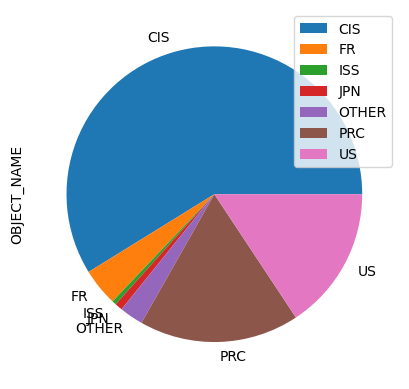

In [121]:
# Pie chart of all Owners since 1980-2000

filtered_df = df.loc[(df["LAUNCH_DATE"] >= "1980-01-01")
                    &  (df["LAUNCH_DATE"] < "2000-01-01")]
df_count = filtered_df.groupby(["OWNER"], as_index=False).count().filter(["OWNER", "OBJECT_NAME"])
df_count["OWNER_NEW"] = df_count.apply(lambda row: row["OWNER"] if row["OBJECT_NAME"] > 100 else "OTHER", axis=1)
df_count.groupby(["OWNER_NEW"]).sum().plot(kind="pie", y="OBJECT_NAME")

<AxesSubplot:ylabel='OBJECT_NAME'>

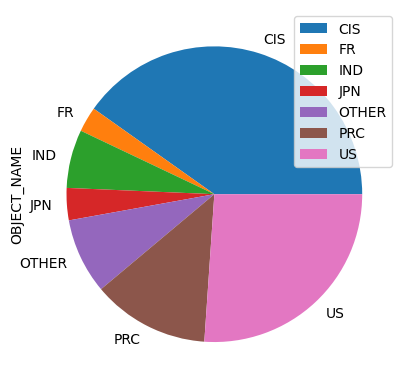

In [122]:
# Pie chart of all Owners from 2000 until 2015

filtered_df = df.loc[(df["LAUNCH_DATE"] >= "2000-01-01")
                    &  (df["LAUNCH_DATE"] < "2015-01-01")]
df_count = filtered_df.groupby(["OWNER"], as_index=False).count().filter(["OWNER", "OBJECT_NAME"])
df_count["OWNER_NEW"] = df_count.apply(lambda row: row["OWNER"] if row["OBJECT_NAME"] > 100 else "OTHER", axis=1)
df_count.groupby(["OWNER_NEW"]).sum().plot(kind="pie", y="OBJECT_NAME")

<AxesSubplot:ylabel='OBJECT_NAME'>

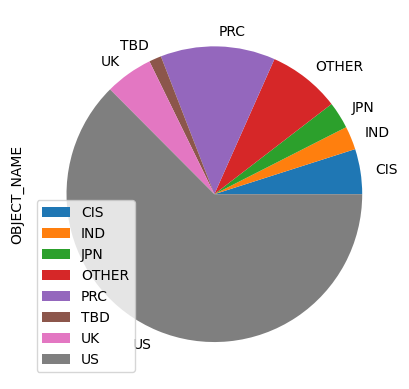

In [123]:
# Pie chart of all Owners from 2015

filtered_df = df.loc[(df["LAUNCH_DATE"] >= "2015-01-01")]
df_count = filtered_df.groupby(["OWNER"], as_index=False).count().filter(["OWNER", "OBJECT_NAME"])
df_count["OWNER_NEW"] = df_count.apply(lambda row: row["OWNER"] if row["OBJECT_NAME"] > 100 else "OTHER", axis=1)
df_count.groupby(["OWNER_NEW"]).sum().plot(kind="pie", y="OBJECT_NAME")

# Launch over the years statistics

In [130]:
df_count = df.groupby(["LAUNCH_YEAR"], as_index=False).count().filter(["LAUNCH_YEAR", "OBJECT_NAME"])

<AxesSubplot:xlabel='LAUNCH_YEAR'>

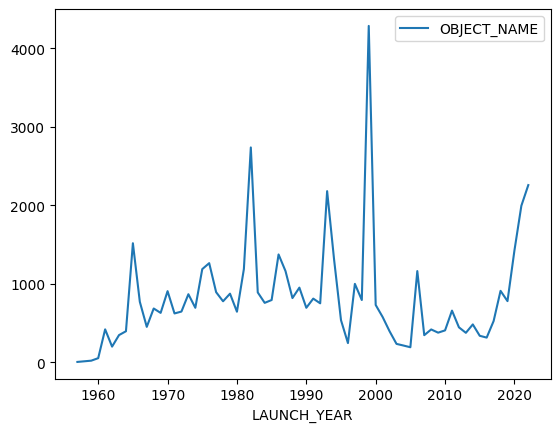

In [132]:
df_count.plot(x="LAUNCH_YEAR", y="OBJECT_NAME")

Hmmmm, interesting... what is that peak in the year 1999?

In [145]:
df1999 = df[df["LAUNCH_YEAR"] == 1999]
df1999

,OBJECT_NAME,OBJECT_ID,NORAD_CAT_ID,OBJECT_TYPE,OPS_STATUS_CODE,OWNER,LAUNCH_DATE,LAUNCH_SITE,DECAY_DATE,PERIOD,INCLINATION,APOGEE,PERIGEE,RCS,DATA_STATUS_CODE,ORBIT_CENTER,ORBIT_TYPE,LAUNCH_YEAR
25606,DELTA 2 R/B(1),1999-001C,25607,R/B,D,US,1999-01-03,AFETR,1999-03-23,88.34,25.82,224.0,161.0,9.6560,NaN,EA,IMP,1999
25615,FORMOSAT-1 (ROCSAT 1),1999-002A,25616,PAY,-,ROC,1999-01-27,AFETR,NaT,93.24,34.94,444.0,423.0,2.4189,NaN,EA,ORB,1999
25616,ATHENA 1 R/B(OAM),1999-002B,25617,R/B,D,US,1999-01-27,AFETR,1999-01-29,89.04,34.68,331.0,122.0,NaN,NaN,EA,IMP,1999
25618,DELTA R/B(1),1999-003B,25619,R/B,NaN,US,1999-02-07,AFETR,NaT,130.38,22.46,3993.0,285.0,10.2540,NaN,EA,ORB,1999
25620,GLOBALSTAR M023,1999-004A,25621,PAY,+,GLOB,1999-02-09,TYMSC,NaT,114.07,52.01,1421.0,1405.0,1.8713,NaN,EA,ORB,1999
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48517,FENGYUN 1C DEB,1999-025FCG,48518,DEB,NaN,PRC,1999-05-10,TAISC,NaT,103.20,99.19,1025.0,795.0,NaN,NaN,EA,ORB,1999
48525,CZ-4B DEB,1999-057TC,48526,DEB,NaN,PRC,1999-10-14,TAISC,NaT,93.92,98.18,478.0,454.0,NaN,NaN,EA,ORB,1999
49244,CZ-4B DEB,1999-057TD,49250,DEB,NaN,PRC,1999-10-14,TAISC,NaT,97.99,98.66,713.0,612.0,NaN,NaN,EA,ORB,1999
49382,FENGYUN 1C DEB,1999-025FCH,49388,DEB,NaN,PRC,1999-05-10,TAISC,NaT,99.61,98.51,812.0,668.0,NaN,NaN,EA,ORB,1999


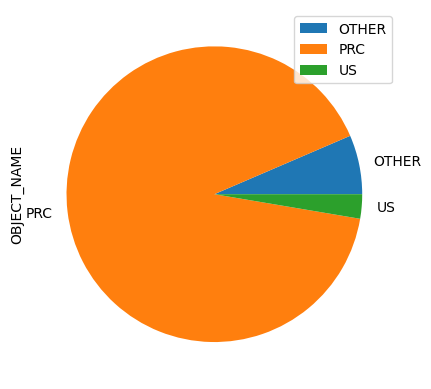

In [148]:
df_count = df1999.groupby(["OWNER"], as_index=False).count().filter(["OWNER", "OBJECT_NAME"])
df_count["OWNER_NEW"] = df_count.apply(lambda row: row["OWNER"] if row["OBJECT_NAME"] > 100 else "OTHER", axis=1)
df_count.groupby(["OWNER_NEW"]).sum().plot(kind="pie", y="OBJECT_NAME")

df1999.to_csv("satcat_1999.csv")

So there were more than 4000 chinese satellite launches. But why? And how?

If we take a closer look at the satellites launched (in `satcat_1999.csv`), we wee that most of them are either `CZ-4B DEB` or `FENGYUN 1C DEB`